# MATH 210 Introduction to Mathematical Computing

## April 1, 2016

Today's Agenda:

1. Example: Vancouver Airport Weather Data
2. More groupby and DataFrame methods

In [1]:
import pandas as pd
%matplotlib inline

## 1. Example: Vancouver Airport Weather Data

Historical weather data is available from [Environment and Climate Change Canada](http://climate.weather.gc.ca/) however the availability is limited. Luckily, the website [vancouver.weatherstats.ca](http://vancouver.weatherstats.ca/download.html) has compiled the historical data for the Vancouver Airport weather station and made the data available.

I have downloaded and edited the weather data from January 1, 2010 to today and saved the data to `wind.csv`. Let's import the data is see some patterns in the weather! The data consists of hourly measurements for pressure (kPa), wind speed (km/h) and direction, and temperature (C) from 12AM January 1, 2010 to 11AM April 1, 2016. 

In [2]:
df = pd.read_csv('wind.csv')

In [3]:
df.head()

,Year,Month,Day,Hour,Pressure,Wind Direction,Wind Speed,Temperature
0,2010,1,1,0,100.87,E,22,5.5
1,2010,1,1,1,100.81,E,19,5.4
2,2010,1,1,2,100.77,E,26,5.7
3,2010,1,1,3,100.69,ESE,26,5.5
4,2010,1,1,4,100.58,ESE,26,5.8


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 54779 entries, 0 to 54778
Data columns (total 8 columns):
Year              54779 non-null int64
Month             54779 non-null int64
Day               54779 non-null int64
Hour              54779 non-null int64
Pressure          54776 non-null float64
Wind Direction    53180 non-null object
Wind Speed        54777 non-null float64
Temperature       54777 non-null float64
dtypes: float64(3), int64(4), object(1)
memory usage: 3.8+ MB


In [5]:
df.tail()

,Year,Month,Day,Hour,Pressure,Wind Direction,Wind Speed,Temperature
54774,2016,4,1,7,102.15,ENE,4,8.7
54775,2016,4,1,8,102.15,ESE,17,10.1
54776,2016,4,1,9,102.15,ESE,11,11.7
54777,2016,4,1,10,102.15,SE,10,13.5
54778,2016,4,1,11,102.15,SSW,13,13.4


## 2. More groupby and DataFrame methods

Let's explore the data!

**EXAMPLE 1.** Plot the average temperature by month in 2015.

Let's do this calculation 2 different ways. First, let's break the process into 5 distinct steps. Second, we'll do it all at once.

**1. Select the 2015 data**

In [6]:
df_2015 = df[df['Year'] == 2015]
df_2015.head()

,Year,Month,Day,Hour,Pressure,Wind Direction,Wind Speed,Temperature
43824,2015,1,1,0,103.07,ESE,8,-2.4
43825,2015,1,1,1,103.01,ESE,10,-3.6
43826,2015,1,1,2,102.96,N,2,-3.6
43827,2015,1,1,3,102.94,E,5,-4.2
43828,2015,1,1,4,102.88,ENE,6,-4.2


**2. Group by month**

Note that a groupby object is a collection of DataFrames: one DataFrame for each distinct value in the Month column which we grouped by. We can use the `.head()` method to display the **top rows of each DataFrame in the groupby object**.

In [7]:
df_2015_grouped = df_2015.groupby('Month')
df_2015_grouped.head(2) # Top 2 rows in each DataFrame in the groupby object

,Year,Month,Day,Hour,Pressure,Wind Direction,Wind Speed,Temperature
43824,2015,1,1,0,103.07,ESE,8,-2.4
43825,2015,1,1,1,103.01,ESE,10,-3.6
44568,2015,2,1,0,102.01,W,8,5.9
44569,2015,2,1,1,101.90,NNE,9,6.0
45240,2015,3,1,0,102.36,N,3,1.5
45241,2015,3,1,1,102.37,NE,4,2.9
45983,2015,4,1,0,102.03,W,13,8.3
45984,2015,4,1,1,102.08,NNW,8,7.2
46703,2015,5,1,0,101.94,E,12,10.6
46704,2015,5,1,1,101.91,E,14,9.7


**3. Select the temperature column**

In [8]:
df_2015_grouped_temp = df_2015_grouped['Temperature']
df_2015_grouped_temp.head(2) # Top 2 rows of the Temperature column in the groupby object

43824    -2.4
43825    -3.6
44568     5.9
44569     6.0
45240     1.5
45241     2.9
45983     8.3
45984     7.2
46703    10.6
46704     9.7
47447    16.0
47448    15.7
48167    20.0
48168    19.3
48911    17.9
48912    18.9
49655    15.0
49656    15.0
50375    11.5
50376    11.5
51119    11.5
51120    10.7
51840     7.1
51841     6.6
Name: Temperature, dtype: float64

**4. Calculate the mean of each DataFrame object in the groupby object**

In [9]:
df_2015_grouped_temp_mean = df_2015_grouped_temp.mean()
df_2015_grouped_temp_mean

Month
1      5.680242
2      7.702827
3      8.424630
4      9.436528
5     14.564516
6     18.034444
7     19.250000
8     18.336694
9     14.096250
10    11.960887
11     5.263800
12     5.180108
Name: Temperature, dtype: float64

**5. Plot the result**

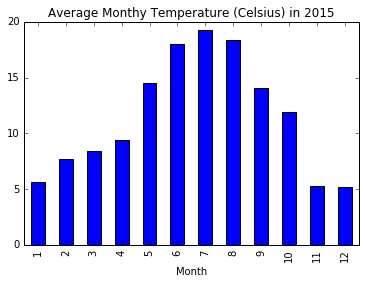

In [10]:
df_2015_grouped_temp_mean.plot(kind='bar',title='Average Monthy Temperature (Celsius) in 2015')

**All 5 steps in one line!**

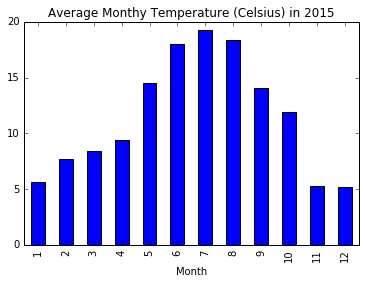

In [11]:
df[df['Year'] == 2015].groupby('Month')['Temperature'].mean().plot(kind='bar',title='Average Monthy Temperature (Celsius) in 2015')

The process of applying methods sequentially in a single line is called **method chaining** and is an advantage of [object oriented programming](https://en.wikipedia.org/wiki/Object-oriented_programming).

**EXAMPLE 2.** Create a histogram of wind direction in January for all years.

Let's select the January data, groupby wind direction and count the number of rows for each wind direction.

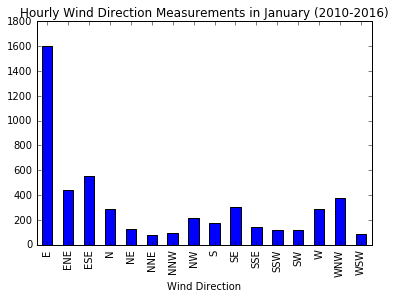

In [12]:
df[df['Month'] == 1].groupby('Wind Direction').size().plot(kind='bar',title='Hourly Wind Direction Measurements in January (2010-2016)')

The prevailing wind direction in January is towards the East (from the Pacific ocean).

**EXAMPLE 3.** Create a histogram of hourly wind direction measurements in August for all years.

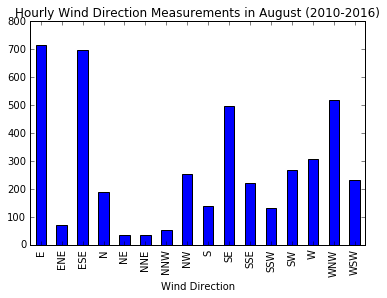

In [13]:
df[df['Month'] == 8].groupby('Wind Direction').size().plot(kind='bar',title='Hourly Wind Direction Measurements in August (2010-2016)')

There is much more variance in the wind direction in August as opposed to January.

**EXAMPLE 4.** Create a histogram of hourly wind direction measurements for all years.

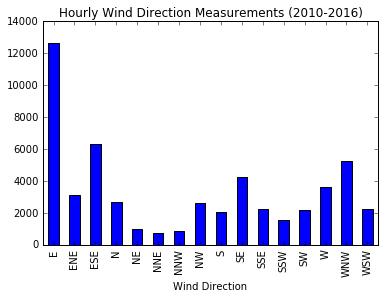

In [14]:
df.groupby('Wind Direction').size().plot(kind='bar',title='Hourly Wind Direction Measurements (2010-2016)')

**EXAMPLE 5.** Plot hourly average wind speed for March 2016. Notice that wind speed follows a periodic diurnal pattern similar to [temperature variation](https://en.wikipedia.org/wiki/Diurnal_temperature_variation).

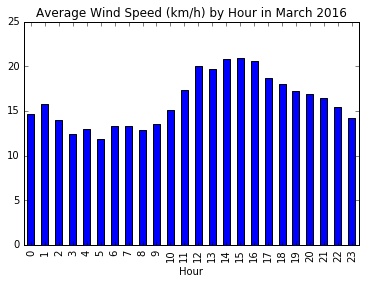

In [15]:
df_March_2016 = df[(df['Month'] == 3) & (df['Year'] == 2016)]
df_March_2016.groupby('Hour')['Wind Speed'].mean().plot(kind='bar',title='Average Wind Speed (km/h) by Hour in March 2016')

**EXAMPLE 6.** Plot the hourly average temperature for March 2015. Compare to Example 5.

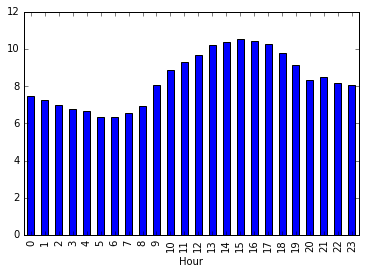

In [16]:
df[(df['Year'] == 2016) & (df['Month'] == 3)].groupby('Hour')['Temperature'].mean().plot(kind='bar')

**EXAMPLE 7.** Create a histogram of wind speeds in December 2015. The distribution of wind speed follows a [Weibull distribution](https://en.wikipedia.org/wiki/Weibull_distribution).

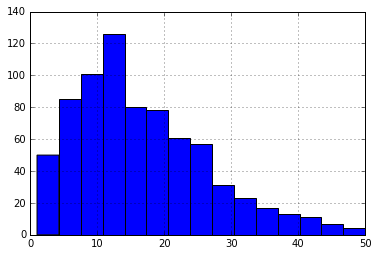

In [17]:
df[(df['Year'] == 2015) & (df['Month'] == 12)]['Wind Speed'].hist(bins=15)